In [13]:
import numpy as np
import pandas as pd

diabetes_dataset = pd.read_csv('diabetes.csv')
diabetes_dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [14]:
diabetes_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [15]:
# Summary statistics
summary_stats = diabetes_dataset.describe()
summary_stats

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [16]:
# Check for missing values
missing_values = diabetes_dataset.isnull().sum()
missing_values

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

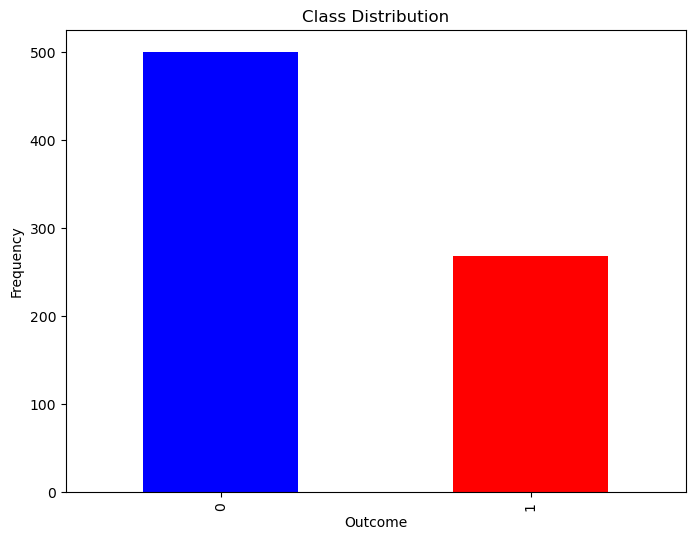

In [17]:
import matplotlib.pyplot as plt
# Class Distribution
plt.figure(figsize=(8, 6))
diabetes_dataset['Outcome'].value_counts().plot(kind='bar', color=['blue', 'red'])
plt.title('Class Distribution')
plt.xlabel('Outcome')
plt.ylabel('Frequency')
plt.show()

In [18]:
# memisahkan data dan label
X = diabetes_dataset.drop (columns='Outcome', axis=1)
Y = diabetes_dataset['Outcome']

In [19]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [20]:
scaler.fit(X)

StandardScaler()

In [21]:
standarized_data = scaler.transform(X)

In [22]:
X = standarized_data
Y = diabetes_dataset['Outcome']

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= 0.2, stratify=Y, random_state=2)

In [24]:
from sklearn import svm
from sklearn.metrics import classification_report,accuracy_score

model_svm = svm.SVC(kernel='linear')

model_svm.fit(X_train, Y_train)
Y_pred_svm = model_svm.predict(X_test)

print(classification_report(Y_test, Y_pred_svm))

              precision    recall  f1-score   support

           0       0.78      0.91      0.84       100
           1       0.76      0.52      0.62        54

    accuracy                           0.77       154
   macro avg       0.77      0.71      0.73       154
weighted avg       0.77      0.77      0.76       154



In [25]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score

# Membuat model KNN dengan jumlah tetangga K=5 (ini bisa disesuaikan)
model_knn = KNeighborsClassifier(n_neighbors=9)

# Melatih model KNN
model_knn.fit(X_train, Y_train)
Y_pred_knn = model_knn.predict(X_test)

print(classification_report(Y_test, Y_pred_knn))

              precision    recall  f1-score   support

           0       0.74      0.89      0.81       100
           1       0.68      0.43      0.52        54

    accuracy                           0.73       154
   macro avg       0.71      0.66      0.67       154
weighted avg       0.72      0.73      0.71       154



In [26]:

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Langkah 4: Buat dan latih model regresi linier
#initiate
model_lr = LogisticRegression()
model_lr.fit(X_train, Y_train)

# Langkah 5: Prediksi dan evaluasi model
Y_pred_reg = model_lr.predict(X_test)

# Evaluasi model
print(classification_report(Y_test, Y_pred_reg))

              precision    recall  f1-score   support

           0       0.77      0.89      0.83       100
           1       0.72      0.52      0.60        54

    accuracy                           0.76       154
   macro avg       0.75      0.70      0.72       154
weighted avg       0.75      0.76      0.75       154



In [27]:
# Metrik evaluasi
mae = mean_absolute_error(Y_test, Y_pred_reg)
mse = mean_squared_error(Y_test, Y_pred_reg)
rmse = np.sqrt(mse)
r2 = r2_score(Y_test, Y_pred_reg)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R²):", r2)

Mean Absolute Error (MAE): 0.24025974025974026
Mean Squared Error (MSE): 0.24025974025974026
Root Mean Squared Error (RMSE): 0.4901629731627434
R-squared (R²): -0.05518518518518545


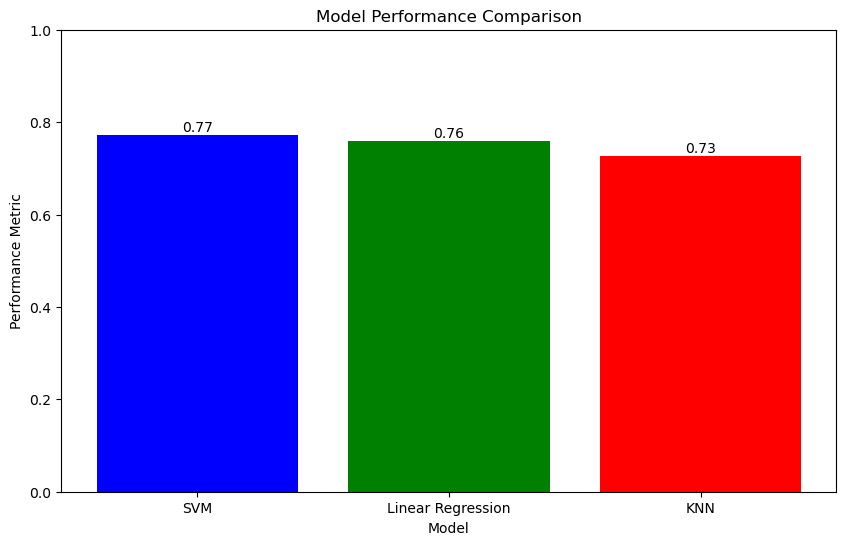

In [28]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import accuracy_score

# Calculate accuracy for classification models
accuracy_svm = accuracy_score(Y_test, Y_pred_svm)
accuracy_knn = accuracy_score(Y_test, Y_pred_knn)
accuracy_reg = accuracy_score(Y_test, Y_pred_reg)

# Create a DataFrame to compare the metrics
comparison_df = pd.DataFrame({
    'Model': ['SVM', 'KNN', 'Linear Regression'],
    'Metric': ['Accuracy', 'Accuracy', 'Accuracy'],
    'Value': [accuracy_svm, accuracy_knn, accuracy_reg]
})

# Sort the DataFrame by the 'Value' column in descending order
comparison_df = comparison_df.sort_values(by='Value', ascending=False)

# Plot the comparison
plt.figure(figsize=(10, 6))
plt.bar(comparison_df['Model'], comparison_df['Value'], color=['blue', 'green', 'red'])
plt.xlabel('Model')
plt.ylabel('Performance Metric')
plt.title('Model Performance Comparison')
for index, value in enumerate(comparison_df['Value']):
    plt.text(index, value, f'{value:.2f}', ha='center', va='bottom')
plt.ylim(0, 1)
plt.show()


In [29]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import pandas as pd
import numpy as np

# SVM model with hyperparameter tuning
param_grid_svm = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}
grid_svm = GridSearchCV(SVC(), param_grid_svm, cv=5, scoring='accuracy')
grid_svm.fit(X_train, Y_train)
best_svm = grid_svm.best_estimator_
Y_pred_svm = best_svm.predict(X_test)
print("Best parameters for SVM:", grid_svm.best_params_)
print("SVM Classification Report:\n", classification_report(Y_test, Y_pred_svm))

Best parameters for SVM: {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}
SVM Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.91      0.84       100
           1       0.76      0.52      0.62        54

    accuracy                           0.77       154
   macro avg       0.77      0.71      0.73       154
weighted avg       0.77      0.77      0.76       154



In [30]:
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}
grid_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=5, scoring='accuracy')
grid_knn.fit(X_train, Y_train)
best_knn = grid_knn.best_estimator_
Y_pred_knn = best_knn.predict(X_test)
print("Best parameters for KNN:", grid_knn.best_params_)
print("KNN Classification Report:\n", classification_report(Y_test, Y_pred_knn))

Best parameters for KNN: {'metric': 'manhattan', 'n_neighbors': 11, 'weights': 'distance'}
KNN Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.87      0.79       100
           1       0.62      0.39      0.48        54

    accuracy                           0.70       154
   macro avg       0.67      0.63      0.63       154
weighted avg       0.69      0.70      0.68       154



In [31]:
param_grid_lr = {
    'C': [0.1, 1, 10, 100],
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
}
grid_lr = GridSearchCV(LogisticRegression(max_iter=1000), param_grid_lr, cv=5, scoring='accuracy')
grid_lr.fit(X_train, Y_train)
best_lr = grid_lr.best_estimator_
Y_pred_lr = best_lr.predict(X_test)
print("Best parameters for Logistic Regression:", grid_lr.best_params_)
print("Logistic Regression Classification Report:\n", classification_report(Y_test, Y_pred_lr))

mae_lr = mean_absolute_error(Y_test, Y_pred_lr)
mse_lr = mean_squared_error(Y_test, Y_pred_lr)
rmse_lr = np.sqrt(mse_lr)
r2_lr = r2_score(Y_test, Y_pred_lr)

print("Logistic Regression Mean Absolute Error (MAE):", mae_lr)
print("Logistic Regression Mean Squared Error (MSE):", mse_lr)
print("Logistic Regression Root Mean Squared Error (RMSE):", rmse_lr)
print("Logistic Regression R-squared (R²):", r2_lr)


c:\Users\HP\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
c:\Users\HP\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
c:\Users\HP\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
c:\Users\HP\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
c:\Users\HP\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour

Best parameters for Logistic Regression: {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}
Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.89      0.83       100
           1       0.72      0.52      0.60        54

    accuracy                           0.76       154
   macro avg       0.75      0.70      0.72       154
weighted avg       0.75      0.76      0.75       154

Logistic Regression Mean Absolute Error (MAE): 0.24025974025974026
Logistic Regression Mean Squared Error (MSE): 0.24025974025974026
Logistic Regression Root Mean Squared Error (RMSE): 0.4901629731627434
Logistic Regression R-squared (R²): -0.05518518518518545


c:\Users\HP\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
c:\Users\HP\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
c:\Users\HP\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
c:\Users\HP\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
c:\Users\HP\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour

In [32]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

# Buat model SVM dengan parameter terbaik
best_model_svm = SVC(C=10, kernel='linear', gamma='scale')

# Lakukan validasi silang
cv_scores_svm = cross_val_score(best_model_svm, X_train, Y_train, cv=5, scoring='accuracy')

print("SVM cross-validation scores:", cv_scores_svm)
print("SVM cross-validation mean score:", cv_scores_svm.mean())

SVM cross-validation scores: [0.80487805 0.75609756 0.76422764 0.83739837 0.74590164]
SVM cross-validation mean score: 0.7817006530721045


In [33]:
from sklearn.neighbors import KNeighborsClassifier

# Buat model K-Nearest Neighbors dengan parameter terbaik
best_model_knn = KNeighborsClassifier(n_neighbors=11, weights='uniform', metric='euclidean')

# Lakukan validasi silang
cv_scores_knn = cross_val_score(best_model_knn, X_train, Y_train, cv=5, scoring='accuracy')

print("K-Nearest Neighbors cross-validation scores:", cv_scores_knn)
print("K-Nearest Neighbors cross-validation mean score:", cv_scores_knn.mean())

K-Nearest Neighbors cross-validation scores: [0.72357724 0.7398374  0.81300813 0.7804878  0.69672131]
K-Nearest Neighbors cross-validation mean score: 0.7507263761162202


In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
import numpy as np

# Definisikan model Logistic Regression
model_lr = LogisticRegression(max_iter=1000, solver='liblinear', C=1.0)

# Lakukan cross-validation
cv_scores = cross_val_score(model_lr, X, Y, cv=5, scoring='accuracy')

# Cetak hasil cross-validation
print("Logistic Regresion Cross-validation scores:", cv_scores)
print("Logistic Regresion Mean cross-validation score:", np.mean(cv_scores))

Logistic Regresion Cross-validation scores: [0.77272727 0.74675325 0.75324675 0.81699346 0.76470588]
Logistic Regresion Mean cross-validation score: 0.7708853238265002


input_data = (6, 148, 72, 35, 0, 33.6, 0.627, 50)

input_data_as_numpy_array = np.array(input_data)

input_data_reshape = input_data_as_numpy_array.reshape(1,-1)

std_data = scaler.transform(input_data_reshape)
print(std_data)

prediction = best_model_svm.predict(std_data)
print(prediction)

if (prediction[0] == 0):
    print('Pasien tidak terkena diabetes')
else :
    print('Pasien terkena diabetes')

In [ ]:
import pickle

filename = '22611028_diabetes_model.sav'
pickle.dump(model_svm, open(filename,'wb'))